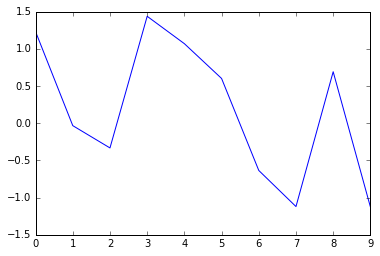

In [1]:
%matplotlib inline
import numpy as np
#from ggplot import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style

# use ggplot style sheet
#style.use('ggplot')

plt.plot(np.random.randn(10))
import csv

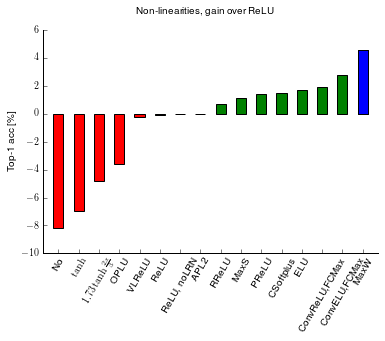

In [23]:
str1='''No	0.389	2.93	No non-linearity
$\\tanh{}$	0.401	2.78	
$1.73\\tanh{\\frac{2x}{3}}$	0.423	2.66	As recommended in Efficient BackProp, LeCun98
OPLU	0.435	2.57
VLReLU	0.469	2.40	y=max(x,x/3)
ReLU	0.470	2.36	With LRN layers
ReLU, noLRN	0.471	2.36	No LRN, as in rest
APL2	0.471	2.38
RReLU	0.478	2.32	
MaxS	0.482	2.30	sqrt(2) narrower layers, 2 pieces. Same complexity, as for ReLU
PReLU	0.485	2.29	
CSoftplus	0.486	2.29	Shifted BNLL aka softplus, y = log(1 + exp(x)) - log(2). Same as ELU, as expected
ELU	0.488	2.28	alpha=1, as in paper
ConvReLU,FCMax	0.490	2.26	ReLU in convolution, Maxout (sqrt(2) narrower) 2 pieces in FC.
ConvELU,FCMax	0.499	2.22	ELU in convolution, Maxout (sqrt(2) narrower) 2 pieces in FC.
MaxW	0.517	2.12	same width layers, 2 pieces'''
names=[]
acces=[]
losses=[]
for name_acc_loss_comm in str1.splitlines():
    try:
        name,acc,loss,comm = name_acc_loss_comm.strip().split("\t")
    except:
        name,acc,loss = name_acc_loss_comm.strip().split("\t")    
    names.append(name)
    acces.append(float(acc))
    losses.append(float(loss))
#Non-linearities
accn=100.*(np.asarray(acces[:]) - acces[6])

plt.rc('text', usetex=True)
fig, ax = plt.subplots()
rects1=ax.bar(2*np.asarray(range(len(acces[0:5])))+1, accn[0:5], 1, color='r')
rects1=ax.bar(2*np.asarray(range(len(acces[5:])))+11, accn[5:], 1, color='g')
rects1=ax.bar(2*np.asarray(range(1))+(len(names)*2-1), accn[-1], 1, color='b')

#rects1=ax.bar(2*5+1, accn[5], 1, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Top-1 acc [\%]')
ax.set_xticks( 2*np.asarray(range(len(names)))+1.5)
ax.set_xticklabels( names[:], rotation=60 ) ;
ax.set_xlim([0,2*len(names)+1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.suptitle('Non-linearities, gain over ReLU')
plt.savefig('../graphs/non-lin.pdf', format='pdf', dpi=1000,bbox_inches='tight')
#ax.legend(names)

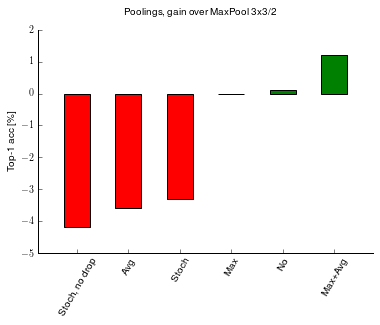

In [26]:
#Pooling

str1='''Stoch, no drop	0.429	2.96	Stoch pool does not prevent overfitting without dropout :(. Good start,bad finish
Avg	0.435	2.56	
Stoch	0.438	2.54	Underfitting, may be try without Dropout
Max	0.471	2.36	290K iters stopped
No	0.472	2.35	Strided conv2,conv3,conv4
Max+Avg	0.483	2.29	Element-wise sum'''
names=[]
acces=[]
losses=[]
for name_acc_loss_comm in str1.splitlines():
    try:
        name,acc,loss,comm = name_acc_loss_comm.strip().split("\t")
    except:
        name,acc,loss = name_acc_loss_comm.strip().split("\t")    
    names.append(name)
    acces.append(float(acc))
    losses.append(float(loss))
#Non-linearities
accn=100.*(np.asarray(acces[:]) - acces[3])

plt.rc('text', usetex=True)
fig, ax = plt.subplots()
rects1=ax.bar(2*np.asarray(range(len(acces[0:3])))+1, accn[0:3], 1, color='r')
rects1=ax.bar(2*np.asarray(range(len(acces[3:])))+7, accn[3:], 1, color='g')
#rects1=ax.bar(2*np.asarray(range(1))+(len(names)*2-1), accn[-1], 1, color='b')

#rects1=ax.bar(2*5+1, accn[5], 1, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Top-1 acc [\%]')
ax.set_xticks( 2*np.asarray(range(len(names)))+1.5)
ax.set_xticklabels( names[:], rotation=60 ) ;
ax.set_xlim([0,2*len(names)+1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.suptitle('Poolings, gain over MaxPool 3x3/2')
plt.savefig('../graphs/pool.pdf', format='pdf', dpi=1000,bbox_inches='tight')
#ax.legend(names)

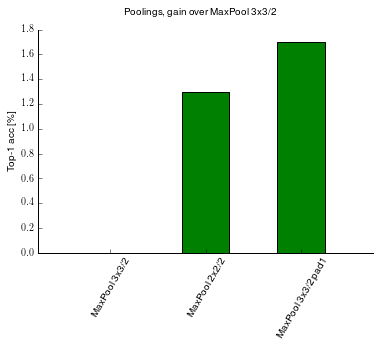

In [27]:
#Pooling

str1='''MaxPool 3x3/2	0.471	2.36	default alexnet
MaxPool 2x2/2	0.484	2.29	Leads to larger feature map, Pool5=4x4 instead of 3x3
MaxPool 3x3/2 pad1	0.488	2.25	Leads to even larger feature map, Pool5=5x5 instead of 3x3'''
names=[]
acces=[]
losses=[]
for name_acc_loss_comm in str1.splitlines():
    try:
        name,acc,loss,comm = name_acc_loss_comm.strip().split("\t")
    except:
        name,acc,loss = name_acc_loss_comm.strip().split("\t")    
    names.append(name)
    acces.append(float(acc))
    losses.append(float(loss))
#Non-linearities
accn=100.*(np.asarray(acces[:]) - acces[0])

plt.rc('text', usetex=True)
fig, ax = plt.subplots()
#rects1=ax.bar(2*np.asarray(range(len(acces[0:3])))+1, accn[0:3], 1, color='r')
rects1=ax.bar(2*np.asarray(range(len(acces[:])))+1, accn[:], 1, color='g')
#rects1=ax.bar(2*np.asarray(range(1))+(len(names)*2-1), accn[-1], 1, color='b')

#rects1=ax.bar(2*5+1, accn[5], 1, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Top-1 acc [\%]')
ax.set_xticks( 2*np.asarray(range(len(names)))+1.5)
ax.set_xticklabels( names[:], rotation=60 ) ;
ax.set_xlim([0,2*len(names)+1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.suptitle('Poolings, gain over MaxPool 3x3/2')
plt.savefig('../graphs/pool-stride.pdf', format='pdf', dpi=1000,bbox_inches='tight')
#ax.legend(names)

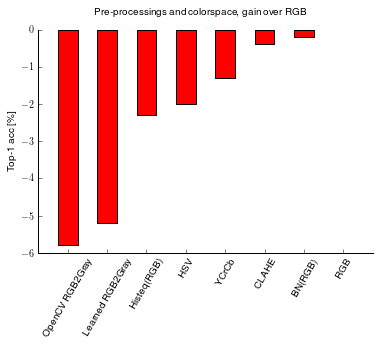

In [34]:
#Colorspace

str1='''OpenCV RGB2Gray	0.413	2.70	RGB->Grayscale Gray = 0.299 R + 0.587 G + 0.114 B
Learned RGB2Gray	0.419	2.66	RGB->conv1x1x1
Histeq(RGB)	0.448	2.48	RGB -> HiestEq
HSV	0.451	2.46	RGB->HSV->BatchNorm(HSV)
YCrCb	0.458	2.42	RGB->YCrCb->BatchNorm(YCrCb)
CLAHE	0.467	2.38	RGB -> LAB -> CLAHE(L)->RGB->BatchNorm(RGB)
BN(RGB)	0.469	2.38	Input = BatchNorm(Img)
RGB	0.471	2.36	default, no changes. Input = 0.04 * (Img - [104, 117,124])'''
names=[]
acces=[]
losses=[]
for name_acc_loss_comm in str1.splitlines():
    try:
        name,acc,loss,comm = name_acc_loss_comm.strip().split("\t")
    except:
        name,acc,loss = name_acc_loss_comm.strip().split("\t")    
    names.append(name)
    acces.append(float(acc))
    losses.append(float(loss))
#Non-linearities
accn=100.*(np.asarray(acces[:]) - acces[7])

plt.rc('text', usetex=True)
fig, ax = plt.subplots()
rects1=ax.bar(2*np.asarray(range(len(acces[0:7])))+1, accn[0:7], 1, color='r')
#rects1=ax.bar(2*np.asarray(range(len(acces[8:])))+17, accn[8:], 1, color='g')
#rects1=ax.bar(2*np.asarray(range(1))+(len(names)*2-1), accn[-1], 1, color='b')

#rects1=ax.bar(2*5+1, accn[5], 1, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Top-1 acc [\%]')
ax.set_xticks( 2*np.asarray(range(len(names)))+1.5)
ax.set_xticklabels( names[:], rotation=60 ) ;
ax.set_xlim([0,2*len(names)+1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.suptitle('Pre-processings and colorspace, gain over RGB')
plt.savefig('../graphs/colorspace.pdf', format='pdf', dpi=1000,bbox_inches='tight')
#ax.legend(names)

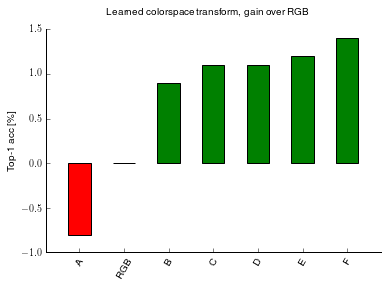

In [37]:
#Learned colorspace
str1='''A	0.463	2.40	RGB -> conv1x1x10 tanh -> conv1x1x3 tanh
RGB	0.471	2.36	default, no changes. Input = 0.04 * (Img - [104, 117,124])
B	0.480	2.32	RGB -> conv1x1x3 vlrelu -> conv1x1x3 vlrelu
C	0.482	2.30	RGB -> conv1x1x10 vlrelu -> conv1x1x3 -> sum(RGB) ->vlrelu
D	0.482	0.482	RGB and log (RGB) -> conv1x1x10 vlrelu -> conv1x1x3 vlrelu
E	0.483	2.30	RGB -> conv1x1x16 vlrelu -> conv1x1x3 vlrelu
F	0.485	2.28	RGB -> conv1x1x10 vlrelu -> conv1x1x3 vlrelu'''
basic_idx=1
names=[]
acces=[]
losses=[]
for name_acc_loss_comm in str1.splitlines():
    try:
        name,acc,loss,comm = name_acc_loss_comm.strip().split("\t")
    except:
        name,acc,loss = name_acc_loss_comm.strip().split("\t")    
    names.append(name)
    acces.append(float(acc))
    losses.append(float(loss))
#Non-linearities
accn=100.*(np.asarray(acces[:]) - acces[basic_idx])

plt.rc('text', usetex=True)
fig, ax = plt.subplots()
rects1=ax.bar(2*np.asarray(range(len(acces[0:basic_idx])))+1, accn[0:basic_idx], 1, color='r')
rects1=ax.bar(2*np.asarray(range(len(acces[basic_idx:])))+2*basic_idx+1, accn[basic_idx:], 1, color='g')
#rects1=ax.bar(2*np.asarray(range(1))+(len(names)*2-1), accn[-1], 1, color='b')

#rects1=ax.bar(2*5+1, accn[5], 1, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Top-1 acc [\%]')
ax.set_xticks( 2*np.asarray(range(len(names)))+1.5)
ax.set_xticklabels( names[:], rotation=60 ) ;
ax.set_xlim([0,2*len(names)+1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.suptitle('Learned colorspace transform, gain over RGB')
plt.savefig('../graphs/learned-colorspace.pdf', format='pdf', dpi=1000,bbox_inches='tight')
#ax.legend(names)




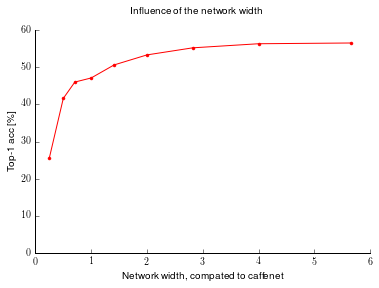

In [51]:
#Network width
str1='''4sqrt(2)x wider	0.565	1.96	5.65
4x wider	0.563	1.92	4
2sqrt(2)x wider	0.552	1.94	2.82
2 wider	0.533	2.04	2
sqrt(2) wider	0.506	2.17	1.41
Default	0.471	2.36	1
sqrt(2)x narrower	0.460	2.41	0.707
2x narrower	0.416	2.68	0.5
4x narrower	0.256	3.33	0.25'''
basic_idx=1
names=[]
acces=[]
losses=[]
xt=[]
for name_acc_loss_comm in str1.splitlines():
    try:
        name,acc,loss,comm = name_acc_loss_comm.strip().split("\t")
    except:
        name,acc,loss = name_acc_loss_comm.strip().split("\t")    
    names.append(name)
    acces.append(float(acc))
    losses.append(float(loss))
    xt.append(float(comm))
#Non-linearities
accn=100.*np.asarray(acces[:])# - acces[basic_idx])
xtarr=np.asarray(xt)
plt.rc('text', usetex=True)
fig, ax = plt.subplots()
rects1=ax.plot(xtarr,accn, 'r.-')
#rects1=ax.bar(2*np.asarray(range(len(acces[basic_idx:])))+2*basic_idx+1, accn[basic_idx:], 1, color='g')
#rects1=ax.bar(2*np.asarray(range(1))+(len(names)*2-1), accn[-1], 1, color='b')

#rects1=ax.bar(2*5+1, accn[5], 1, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Top-1 acc [\%]')
ax.set_xlabel('Network width, compated to caffenet')

#ax.set_xticks( 2*np.asarray(range(len(names)))+1.5)
#ax.set_xticklabels( names[:], rotation=60 ) ;
#ax.set_xlim([0,2*len(names)+1])
ax.set_ylim([0,60])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.suptitle('Influence of the network width')
plt.savefig('../graphs/width.pdf', format='pdf', dpi=1000,bbox_inches='tight')
#ax.legend(names)


